We need to take bank/bank-full.csv file from the downloaded zip-file.
In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposit or not.
Features

For the rest of the homework, you'll need to use only these columns:

    age,
    job,
    marital,
    education,
    balance,
    housing,
    contact,
    day,
    month,
    duration,
    campaign,
    pdays,
    previous,
    poutcome,
    y

Data preparation

    Select only the features from above.
    Check if the missing values are presented in the features.

### Question 1

What is the most frequent observation (mode) for the column education?

    unknown
    primary
    secondary
    tertiary


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank_marketing_data/bank/bank-full.csv', sep=';')
len(df)

45211

In [63]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [64]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# get catagorical columns
catagorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in catagorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [65]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [67]:
feature_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y']

In [68]:
df[needed_columns].T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
duration,261,151,76,92,198,139,217,380,50,55,...,226,224,266,300,386,977,456,1127,508,361


In [69]:
df = df[needed_columns]

In [70]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
duration,261,151,76,92,198,139,217,380,50,55,...,226,224,266,300,386,977,456,1127,508,361


In [71]:
# Most Frequent Observation for education
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

    age and balance
    day and campaign
    day and pdays
    pdays and previous


In [72]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [73]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [74]:
df[numerical]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [75]:
# age and balance: 0.097783
df[numerical].corrwith(df.age)

age         1.000000
balance     0.097783
day        -0.009120
duration   -0.004648
campaign    0.004760
pdays      -0.023758
previous    0.001288
dtype: float64

In [76]:
# campaign and day: 0.162490
df[numerical].corrwith(df.campaign)

age         0.004760
balance    -0.014578
day         0.162490
duration   -0.084570
campaign    1.000000
pdays      -0.088628
previous   -0.032855
dtype: float64

In [77]:
# pdays and day: -0.093044
df[numerical].corrwith(df.pdays)

age        -0.023758
balance     0.003435
day        -0.093044
duration   -0.001565
campaign   -0.088628
pdays       1.000000
previous    0.454820
dtype: float64

In [78]:
# previous and pdays: 0.454820
df[numerical].corrwith(df.previous)

age         0.001288
balance     0.016674
day        -0.051710
duration    0.001203
campaign   -0.032855
pdays       0.454820
previous    1.000000
dtype: float64

In [79]:
# age and balance: 0.097783
# campaign and day: 0.162490
# pdays and day: -0.093044
# previous and pdays: 0.454820
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

In [80]:
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


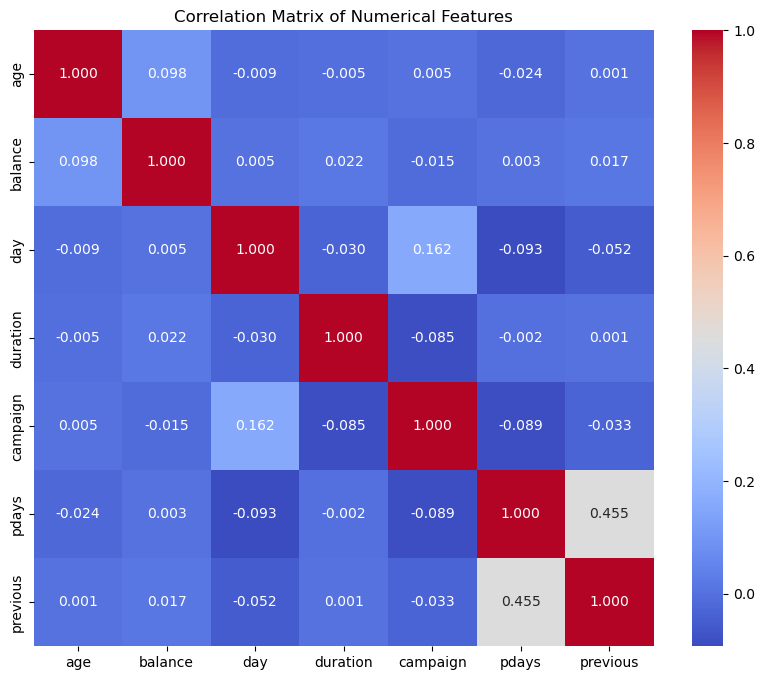

In [82]:
# age/balance: 0.097783 	
# day/campaign: 0.162490
# day/pdays: -0.093044
# pdays/previous: 0.454820

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Target encoding

    Now we want to encode the y variable.
    Let's replace the values yes/no with 1/0.


In [84]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [85]:
(df.y == 'yes').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [86]:
df.y = (df.y == 'yes').astype(int)

In [87]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


### Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value y is not in your dataframe.


In [92]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_full_train), len(df_test), len(df_test)

(36168, 9043, 9043)

In [93]:
# make the data sequential in the data sets as it has been randomized
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [95]:
# set the y/target values for the model
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [96]:
del df_train['y']
del df_val['y']
del df_test['y']

In [97]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown


### Question 3

    Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
    Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

    contact
    education
    housing
    poutcome


In [99]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

In [100]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object